In [ ]:
# Load libraries
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [ ]:
# load dataset
pima = pd.read_csv("Label_with_data.csv")
pima.head()

,TARGET_FID,Img,Species,target_x,target_y,COUNTYNAME,TOWNNAME,town_x,town_y
0,0,000b43a3-d331-47ad-99a4-4c0fa9b48298.jpg,asparagus,0,0,彰化縣,二林鎮,120.404221,23.916302
1,1,00172189-3156-48d7-bb1e-f0a922bc54b8.jpg,asparagus,0,0,彰化縣,二林鎮,120.404221,23.916302
2,2,002aec7b-648e-4d1f-9463-a43c0304e774.jpg,asparagus,0,0,嘉義縣,新港鄉,120.348282,23.545908
3,3,007cd63a-333c-47f2-b2e2-193f76f7c684.jpg,asparagus,0,0,雲林縣,土庫鎮,120.364716,23.691204
4,4,00a326ba-7e9a-4bc1-8684-4bf404bfd6bb.jpg,asparagus,0,0,雲林縣,斗南鎮,120.482628,23.670769


In [ ]:
# split dataset in features and target variable
feature_cols = ['town_x', 'town_y']
X = pima[feature_cols] # Features
y = pima['Species'] # Target variable

In [ ]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2) # 70% training and 30% test

In [ ]:
# Create Decision Tree classifer object
clf = RandomForestClassifier(criterion="entropy", max_depth=7)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

# Predict the response for test dataset
y_pred = clf.predict(X_test)

In [ ]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.4121020294172407


In [ ]:
prob = clf.predict_proba(X_test[1:2])
print(prob[0])

[9.69146370e-03 3.38271375e-03 2.75616105e-02 8.86909495e-05
 0.00000000e+00 1.41808632e-02 8.06299031e-04 1.76582336e-03
 0.00000000e+00 2.27180003e-01 1.99640275e-03 3.96463556e-03
 6.42573451e-02 5.84005188e-05 3.41203240e-03 7.59314809e-03
 2.43449068e-02 1.81053655e-02 0.00000000e+00 5.28871372e-05
 7.19363935e-03 2.40679255e-03 4.17777320e-05 1.63857069e-01
 3.43477033e-01 9.04318834e-03 2.08966122e-02 2.57062803e-02
 0.00000000e+00 7.32897032e-03 1.10381262e-02 0.00000000e+00
 5.67919349e-04]


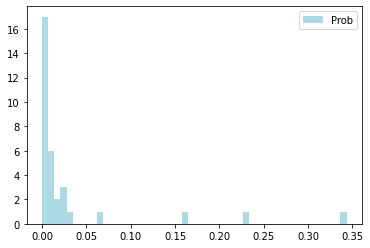

In [ ]:
import matplotlib.pyplot as plt
plt.hist(prob[0], bins=50, color='lightblue', label="Prob")
plt.legend()
plt.show()

## Top5

In [ ]:
print(clf.classes_)

['asparagus' 'bambooshoots' 'betel' 'broccoli' 'cauliflower'
 'chinesecabbage' 'chinesechives' 'custardapple' 'grape' 'greenhouse'
 'greenonion' 'kale' 'lemon' 'lettuce' 'litchi' 'longan' 'loofah' 'mango'
 'onion' 'others' 'papaya' 'passionfruit' 'pear' 'pennisetum' 'redbeans'
 'roseapple' 'sesbania' 'soybeans' 'sunhemp' 'sweetpotato' 'taro' 'tea'
 'waterbamboo']


## Visualize

In [ ]:
from sklearn.tree import export_graphviz
import pydotplus

def tree_graph_to_png(tree, feature_names, png_file_to_save):
    tree_str = export_graphviz(tree, feature_names=feature_names,
                   filled=True, out_file=None, class_names=clf.classes_)
    graph = pydotplus.graph_from_dot_data(tree_str)  
    graph.write_png(png_file_to_save)


estimator = clf.estimators_[5]
tree_graph_to_png(estimator, feature_names=['town_x', 'town_y'], png_file_to_save='dt.png')